<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX**


## Tarea: Exploración y preparación de datos


Estimated time needed: **70** minutes


En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia en su sitio web el lanzamiento del cohete Falcon 9 con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno. Gran parte del ahorro se debe a que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizarás análisis exploratorio de datos e ingeniería de características.ng.


La primera etapa del Falcon 9 aterrizará con éxito


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


A continuación se muestran varios ejemplos de aterrizajes fallidos:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


La mayoría de los aterrizajes fallidos están planificados. SpaceX realiza un aterrizaje controlado en los océanos.

## Objetivos

Realizar análisis exploratorio de datos e ingeniería de características con Pandas y Matplotlib

* Análisis exploratorio de datos
* Preparación de la ingeniería de características de datos

### Importar bibliotecas y definir funciones auxiliares

Importaremos las siguientes librerías al laboratorio

In [16]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [17]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Análisis exploratorio de datos


Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen

In [18]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, veamos cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

Podemos representar gráficamente el valor de <code>FlightNumber</code> frente a <code>PayloadMass</code> y superponer el resultado del lanzamiento. Observamos que, a medida que aumenta el número de vuelo, la primera etapa tiene más probabilidades de aterrizar con éxito. La masa de la carga útil también parece ser un factor; incluso con cargas útiles más pesadas, la primera etapa suele regresar con éxito.

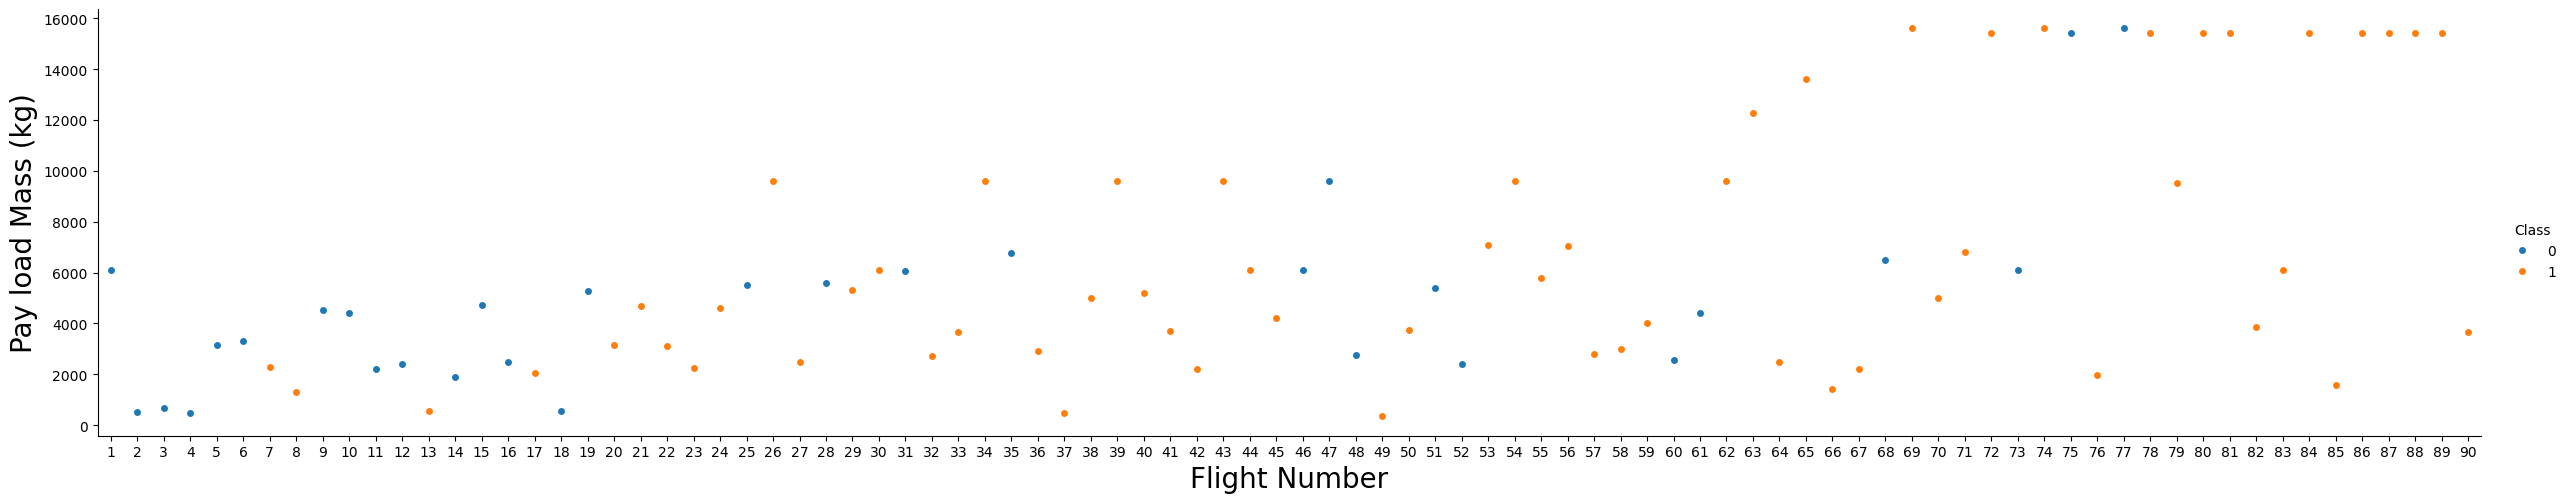

In [19]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.

### TAREA 1: Visualizar la relación entre el número de vuelo y el lugar de lanzamiento

Utilice la función <code>catplot</code> para representar gráficamente <code>FlightNumber</code> frente a <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>.

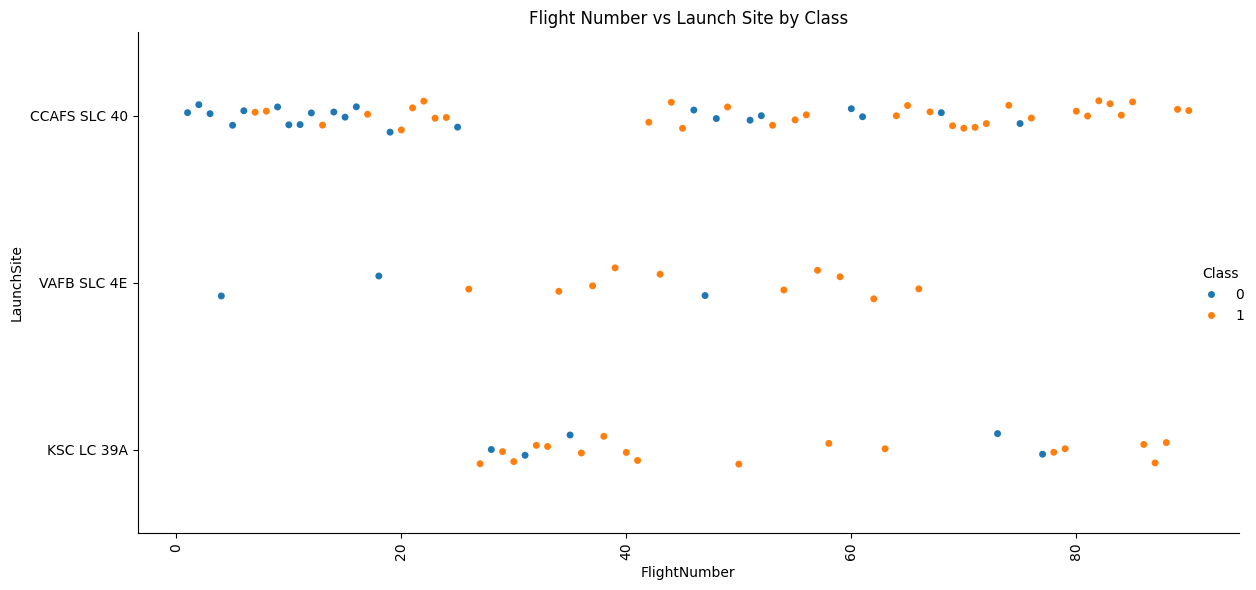

In [20]:
# Dibuje un gráfico de puntos de dispersión con el eje x como número de vuelo, el eje y como sitio de lanzamiento y el tono como valor de clase.
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', kind='strip', height=6, aspect=2)

# Mostrar el gráfico
plt.title('Flight Number vs Launch Site by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión de Número de vuelo vs. Lugar de lanzamiento.

A lo largo del tiempo, los lanzamientos tienden a volverse más exitosos.

Algunos sitios como CCAFS SLC 40 muestran una curva de aprendizaje clara.

Sitios como VAFB SLC 4E y KSC LC 39A parecen haber tenido un enfoque más estratégico o reservado.

### TAREA 2: Visualizar la relación entre la masa de la carga útil y el sitio de lanzamiento


También queremos observar si existe alguna relación entre los sitios de lanzamiento y su masa de carga útil.

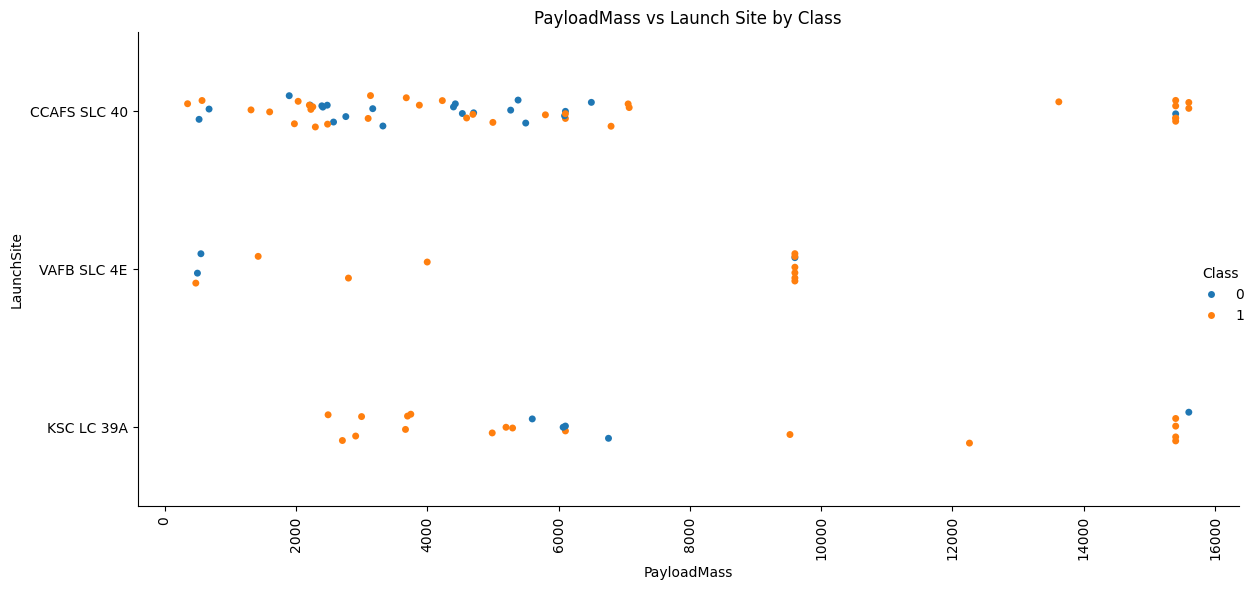

In [21]:
# Dibuje un gráfico de puntos de dispersión con el eje x como masa de carga útil (kg), el eje y como sitio de lanzamiento y el tono como valor de clase.
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', kind='strip', height=6, aspect=2)

# Mostrar el gráfico
plt.title('PayloadMass vs Launch Site by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Ahora bien, si observa el gráfico de puntos de dispersión de masa de carga útil versus lugar de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no hay cohetes lanzados para una masa de carga útil pesada (superior a 10 000).

### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

Creemos un «gráfico de barras» para la tasa de éxito de cada órbita.

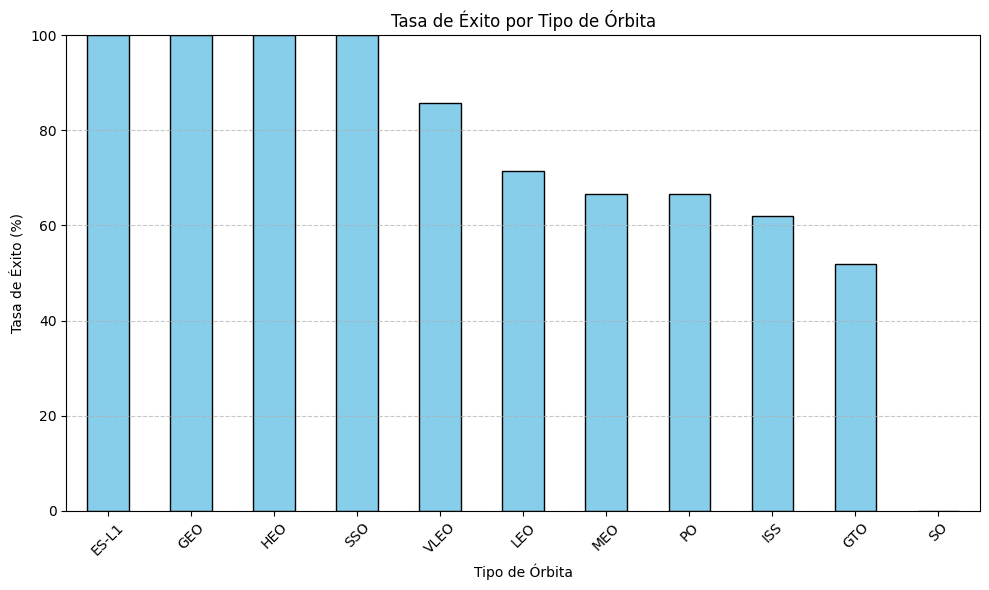

In [22]:
# SUGERENCIA use el método groupby en la columna Órbita y obtenga la media de la columna Clase

# Agrupar por tipo de órbita y calcular la tasa de éxito promedio
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False) * 100

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
success_rate_by_orbit.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Tasa de Éxito por Tipo de Órbita')
plt.xlabel('Tipo de Órbita')
plt.ylabel('Tasa de Éxito (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Analice el gráfico de barras trazado para identificar qué órbitas tienen las tasas de éxito más altas.

### TAREA 4: Visualizar la relación entre el número de vuelo y el tipo de órbita

Para cada órbita, queremos ver si existe alguna relación entre el número de vuelo y el tipo de órbita.

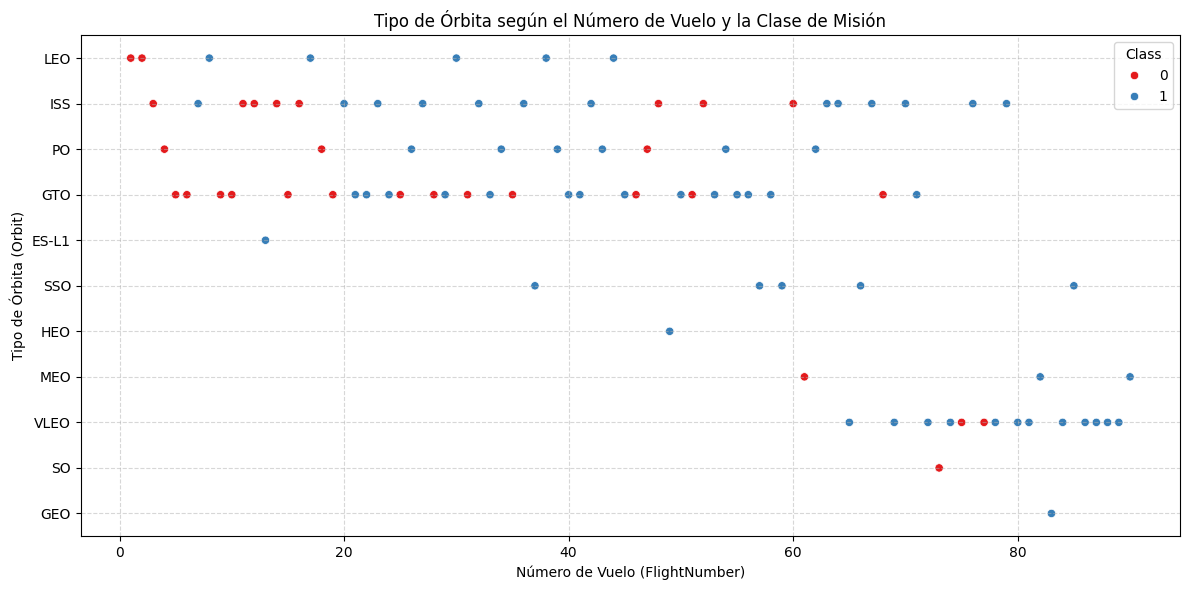

In [23]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber y el eje y como la órbita, y el tono como el valor de la clase
plt.figure(figsize=(12, 6))

# Gráfico de dispersión con hue como Class
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='Set1')

plt.title('Tipo de Órbita según el Número de Vuelo y la Clase de Misión')
plt.xlabel('Número de Vuelo (FlightNumber)')
plt.ylabel('Tipo de Órbita (Orbit)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Se puede observar que, en la órbita LEO, el éxito parece estar relacionado con el número de vuelos. Por el contrario, en la órbita GTO, no parece haber relación entre el número de vuelos y el éxito.

### TAREA 5: Visualizar la relación entre la masa de la carga útil y el tipo de órbita

De manera similar, podemos trazar los gráficos de puntos de dispersión de masa de carga útil vs. órbita para revelar la relación entre la masa de carga útil y el tipo de órbita.

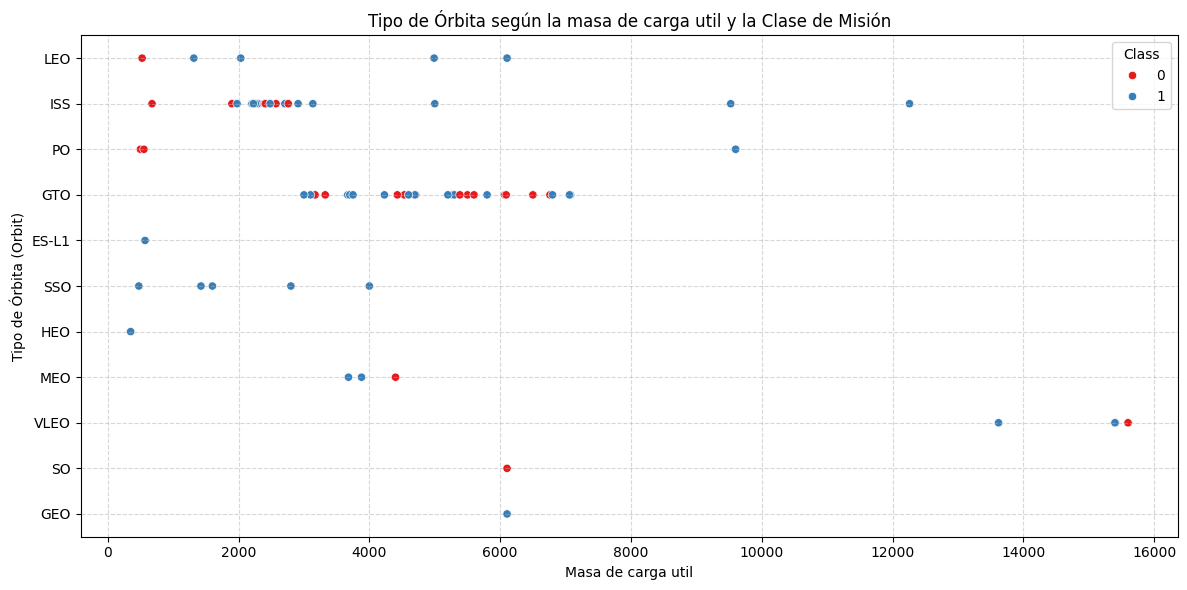

In [24]:
# Dibuje un gráfico de puntos de dispersión con el eje x como masa de carga útil, el eje y como órbita y el tono como valor de clase.
plt.figure(figsize=(12, 6))

# Gráfico de dispersión con hue como Class
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set1')

plt.title('Tipo de Órbita según la masa de carga util y la Clase de Misión')
plt.xlabel('Masa de carga util')
plt.ylabel('Tipo de Órbita (Orbit)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Con cargas útiles pesadas, la tasa de aterrizajes exitosos o positivos es mayor en la Estación Polar, la LEO y la ISS.

Sin embargo, para la GTO, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.

### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento

Puede trazar un gráfico de líneas con el eje x como Año y el eje y como tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

La función le ayudará a obtener el año a partir de la fecha:

In [25]:
# Una función para extraer años de la fecha
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


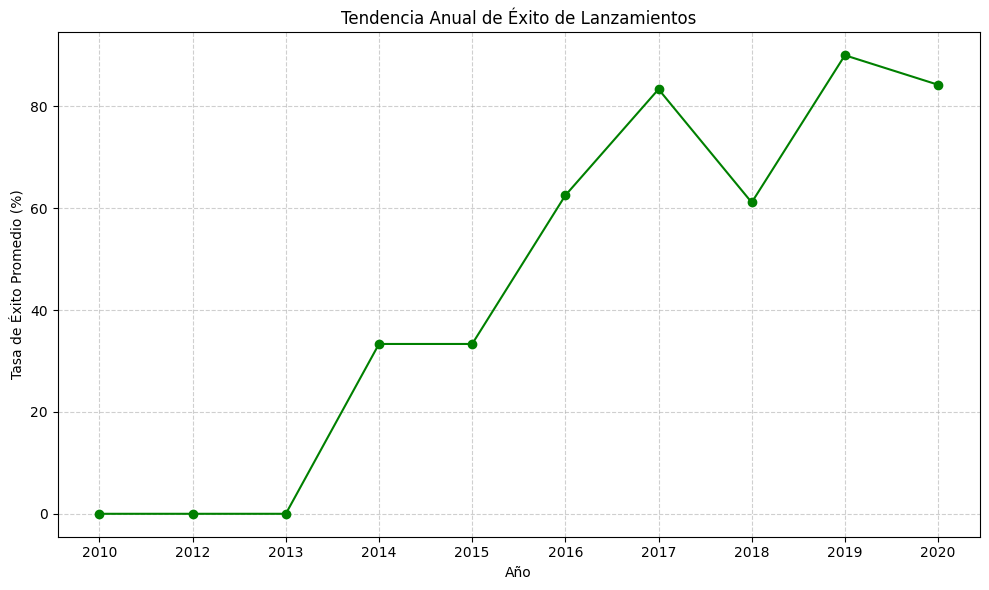

In [26]:




# Calcular tasa de éxito promedio por año
success_rate_by_year = df.groupby(year)['Class'].mean() * 100

# Graficar la tendencia anual
plt.figure(figsize=(10, 6))
plt.plot(success_rate_by_year.index, success_rate_by_year.values, marker='o', color='green')

plt.title('Tendencia Anual de Éxito de Lanzamientos')
plt.xlabel('Año')
plt.ylabel('Tasa de Éxito Promedio (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020.

## Características Ingeniería

A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas


Utilice la función <code>get_dummies</code> y el dataframe <code>features</code> para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code> y muestre los resultados mediante el método head. El dataframe de resultados debe incluir todas las características, incluidas las codificadas.


In [28]:
# SUGERENCIA: Utilice la función get_dummies() en las columnas categórica
features_one_hot = pd.get_dummies(features[[ "Orbit","LaunchSite","LandingPad","Serial"]])
features = pd.concat([features, features_one_hot],  axis = 1 )
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False


### TAREA 8: Convertir todas las columnas numéricas a `float64`

Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierta todo el marco de datos al tipo de variable <code>float64</code>

In [33]:
# SUGERENCIA: utilice la función astype
features_one_hot=features_one_hot.astype('float64')
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora podemos exportarlo a un <b>CSV</b> para la siguiente sección, pero para que las respuestas sean consistentes, en el próximo laboratorio proporcionaremos datos en un rango de fechas preseleccionado.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
